In [1]:
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [2]:
data=sns.load_dataset('titanic')

In [3]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


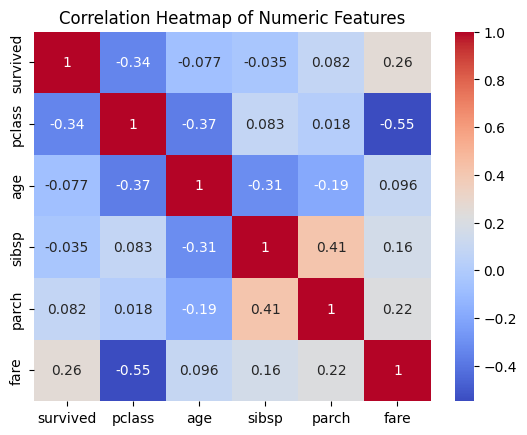

In [4]:
numeric_columns = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


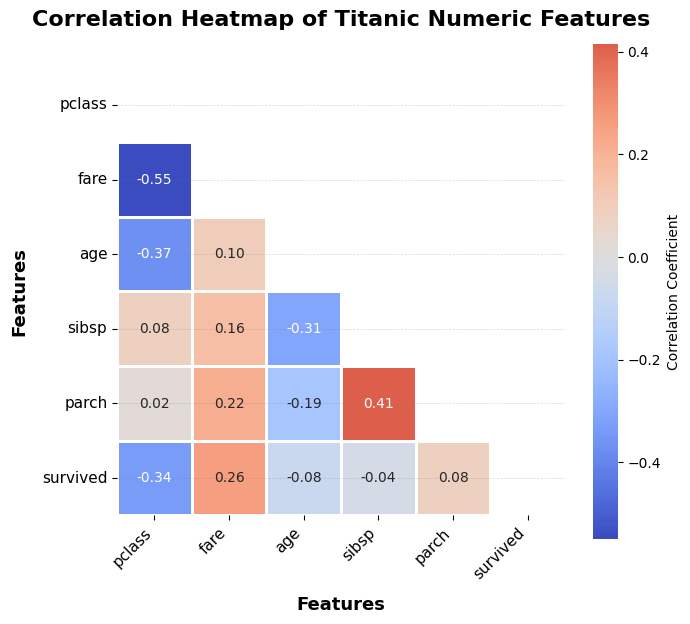

In [36]:
corr_matrix = numeric_columns.corr()
sorted_corr = corr_matrix.loc[:, corr_matrix.columns].abs().sum().sort_values(ascending=False).index
sorted_corr_matrix = corr_matrix.loc[sorted_corr, sorted_corr]
plt.figure(figsize=(7, 7))
sns.heatmap(
    sorted_corr_matrix,
    mask=mask,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}
)
plt.title('Correlation Heatmap of Titanic Numeric Features', fontsize=16, fontweight='bold', pad=30)
plt.xlabel('Features', fontsize=13, fontweight='bold', labelpad=10)
plt.ylabel('Features', fontsize=13, fontweight='bold', labelpad=10)
plt.xticks(fontsize=11, rotation=45, ha='right')
plt.yticks(fontsize=11, rotation=0)
plt.grid(axis='y', color='grey', linestyle='--', linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

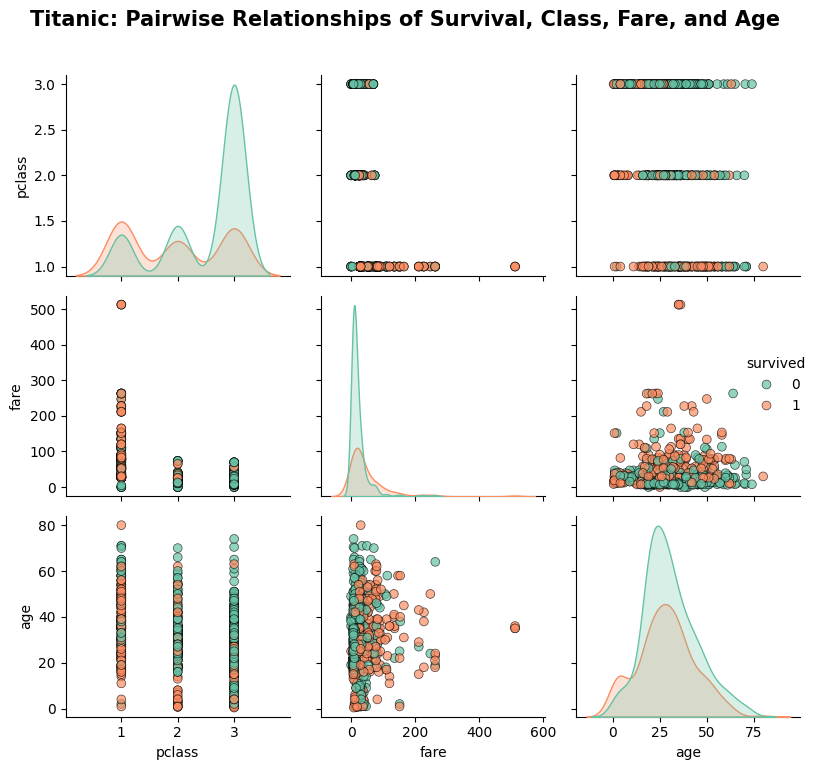

In [35]:
sns.pairplot(
    subset_data,
    hue='survived',
    diag_kind='kde',
    palette='Set2',
    height=2.5,
    plot_kws={'alpha': 0.7, 's': 40, 'edgecolor': 'k'},
    diag_kws={'fill': True}
)
plt.suptitle('Titanic: Pairwise Relationships of Survival, Class, Fare, and Age', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


## 📊 Visualizing Multivariate Relationships in the Titanic Dataset

Using the Titanic dataset from Seaborn, complete the following visualizations:

---

### 1. Grouped Bar Chart

- **Show:** Survival rate (`survived`)
- **Breakdown:** By passenger class (`pclass`)
- **Hue:** Gender (`sex`)

---

### 2. Facet Grid of Histograms

- **Plot:** Distribution of age (`age`)
- **Separate by:** Gender (`sex`)
- **Facets:** One subplot for passengers who survived, and one for those who didn’t

---

#### **Enhancements:**

- Add **clear, descriptive titles**
- Label axes appropriately
- Use a **visually appealing color palette**

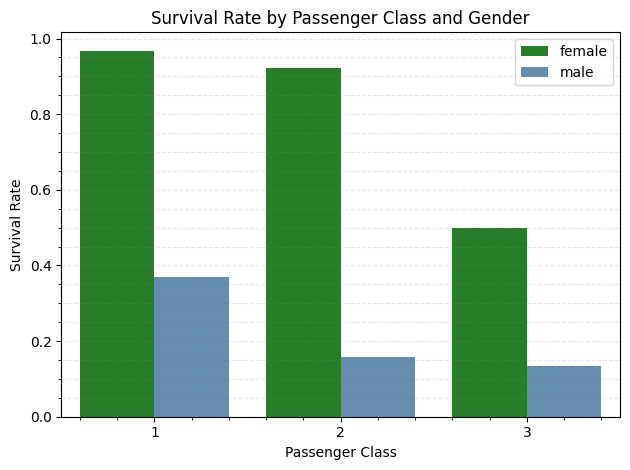

In [6]:
color_map = {
    "male": "steelblue",
    "female": "green"
}
sns.barplot(data=data, x='pclass', y='survived', hue = 'sex', 
            palette=color_map, errorbar = None, alpha = 0.9)
plt.title('Survival Rate by Passenger Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.minorticks_on()
plt.grid(color = 'grey', axis='y', linestyle='--', alpha=0.2, which = 'both')
plt.legend()
plt.tight_layout()
plt.show()


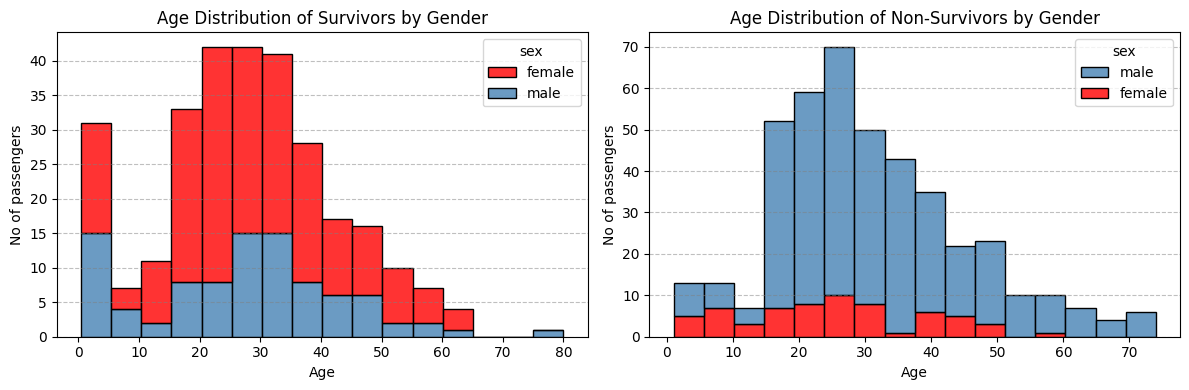

In [7]:
color_map = {
    "male": "steelblue",
    "female": "red"
}
fig, ax = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(data=data[data['survived'] == 1], x='age', hue='sex', palette=color_map, ax=ax[0], alpha=0.8, multiple = 'stack', edgecolor='black')
ax[0].set_title('Age Distribution of Survivors by Gender')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('No of passengers')
ax[0].grid(axis='y',color='grey', linestyle='--', alpha=0.5)
# for p in ax[0].patches:
#     ax[0].annotate(f"{p.get_height():.2f}", 
#                 (p.get_x() + p.get_width()/2., p.get_height()),
#                 ha='center', va='bottom', fontsize=9, fontweight='bold')


sns.histplot(data=data[data['survived'] == 0], x='age', hue='sex', palette=color_map, ax=ax[1], alpha=0.8, multiple = 'stack'
             , edgecolor='black')
ax[1].set_title('Age Distribution of Non-Survivors by Gender')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('No of passengers')

plt.grid(axis = 'y', color='grey', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## ✈️ Problem: Visualizing Flight Delays

You are given a dataset of flight delays (you can use Seaborn's built-in **flights** dataset).

---

### Tasks

1. **Load the dataset and inspect the data.**

2. **Create a heatmap** that shows the total number of passengers (`passengers`) per month for each year.

3. **Add the following enhancements:**
    - Use a color palette that goes from **light yellow to dark red** (high = more passengers).
    - **Annotate** each cell with the passenger count.
    - Add a **title** and **axis labels** with proper formatting (**bold, larger font**).
    - **Rotate** the x-axis labels for readability.
    - Add **grid lines** for clarity.



In [8]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [9]:
pivot_data = flights.pivot_table(index='month', columns='year', values='passengers', aggfunc='sum')

C:\Users\manij\AppData\Local\Temp\ipykernel_61340\2330381504.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data = flights.pivot_table(index='month', columns='year', values='passengers', aggfunc='sum')


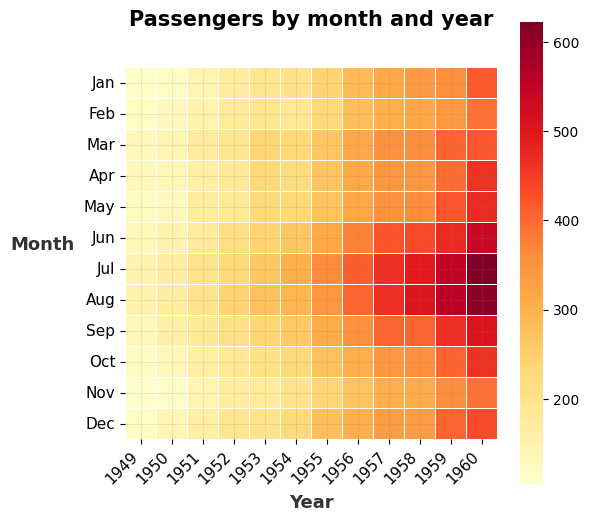

In [10]:
plt.figure(figsize=(6,6))
sns.heatmap(pivot_data, cmap='YlOrRd', fmt='.2f',
    square=True,
    linewidths=0.5)
plt.title('Passengers by month and year', fontsize = 15, pad = 30, fontweight = 'bold')
plt.xlabel('Year', fontsize=13, labelpad=5, color='#333', fontweight='bold', family='sans-serif')
plt.ylabel('Month', fontsize=13, labelpad=30, rotation=0, color='#333', fontweight='bold', family='sans-serif')
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation = 0, fontsize=11)
plt.grid(axis='both', color='grey', linestyle='--', linewidth=0.5, alpha=0.3)

## 📈 Problem: Trend of Air Passengers Over Time with Seasonality Highlight

Create a line plot showing the **total number of passengers per month** across all years (aggregate by month).

- **Highlight** the month with the highest average passengers in a different color or marker.
- Add a **moving average** (window=3) line to show the trend smoothly.
- Include **proper titles, labels, and legend** for clarity.



C:\Users\manij\AppData\Local\Temp\ipykernel_61340\1810844637.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  table = flights.pivot_table(values = 'passengers', index = 'month', aggfunc='sum')


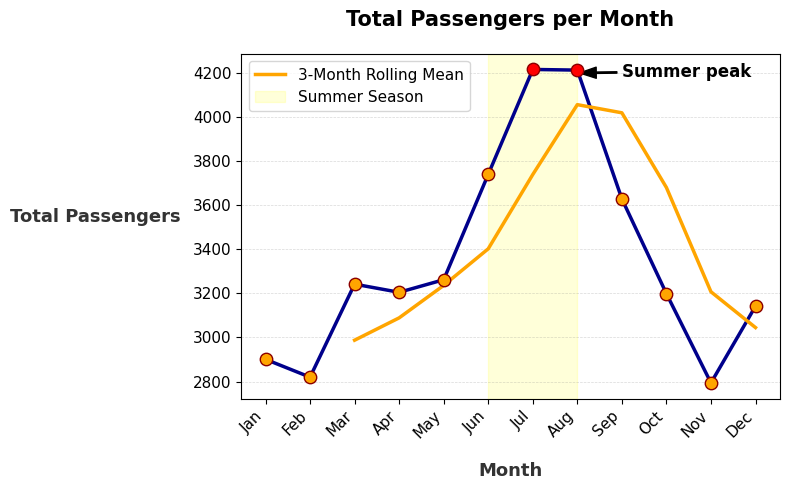

In [11]:
table = flights.pivot_table(values = 'passengers', index = 'month', aggfunc='sum')
rolling_mean = table['passengers'].rolling(window=3).mean()
# Option 1: Using matplotlib for individual marker colors
plt.figure(figsize=(8, 5))

# Plot the line with markers
plt.plot(table.index, table['passengers'], linewidth=2.5, color='darkblue', 
         marker='o', markersize=8, markerfacecolor='green', markeredgecolor='red')
plt.plot(table.index, rolling_mean, color='orange', linewidth=2.5, linestyle='-', label='3-Month Rolling Mean')
# Add markers with individual colors
for i, (month, passengers) in enumerate(table.iterrows()):
    color = 'red' if month in ['Jul', 'Aug'] else 'orange'
    plt.scatter(i, passengers, color=color, s=80, edgecolor='darkred', linewidth=1, zorder=5)

plt.annotate('Summer peak', xy=(7, 4200), xytext=(8, 4180),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             fontsize=12, color='black', fontweight='bold')
plt.title('Total Passengers per Month', fontsize=15, pad=20, fontweight='bold')
plt.xlabel('Month', fontsize=13, labelpad=15, color='#333', fontweight='bold', family='sans-serif')
plt.ylabel('Total Passengers', fontsize=13, labelpad=70, rotation=0, color='#333', fontweight='bold', family='sans-serif')
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.axvspan(5, 7, color='yellow', alpha=0.15, label='Summer Season')
plt.grid(axis='y', color='grey', linestyle='--', linewidth=0.5, alpha=0.3)
plt.legend(fontsize=11, title_fontsize='13', loc='upper left')
plt.tight_layout()
plt.show()

In [12]:
table

,passengers
month,
Jan,2901
Feb,2820
Mar,3242
Apr,3205
May,3262
Jun,3740
Jul,4216
Aug,4213
Sep,3629
